# Harris Corner Detection

### Import resources and display image

Correction: The magnitude should be calculated as the sum of the Gx and Gy components, rho = sqrt(Gx^2 + Gy^2).
the idea is that corners are very good signatures for distinguishing between objects 
![corner detection](./images/snap1_corner_mountain.png)
![corner detection](./images/snap1_gradient.png)
![corner detection](./images/snap1_gradient2.png)
![corner detection](./images/snap1_gradient3.png)

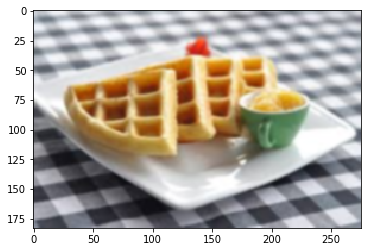

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

%matplotlib inline

# Read in the image
image = cv2.imread('images/waffle.jpg')

# Make a copy of the image
image_copy = np.copy(image)

# Blur image
image_copy = cv2.GaussianBlur(image_copy, (5,5),0)

# Change color to RGB (from BGR)
image_copy = cv2.cvtColor(image_copy, cv2.COLOR_BGR2RGB)

plt.imshow(image_copy)

### Detect corners

Dilation and Erosion

Dilation and erosion are known as morphological operations. They are often performed on binary images, similar to contour detection. Dilation enlarges bright, white areas in an image by adding pixels to the perceived boundaries of objects in that image. Erosion does the opposite: it removes pixels along object boundaries and shrinks the size of objects.

Often these two operations are performed in sequence to enhance important object traits!
Dilation

To dilate an image in OpenCV, you can use the dilate function and three inputs: an original binary image, a kernel that determines the size of the dilation (None will result in a default size), and a number of iterations to perform the dilation (typically = 1). In the below example, we have a 5x5 kernel of ones, which move over an image, like a filter, and turn a pixel white if any of its surrounding pixels are white in a 5x5 window! We’ll use a simple image of the cursive letter “j” as an example.


Erosion

To erode an image, we do the same but with the erode function.

[open cv examples](https://docs.opencv.org/2.4/doc/tutorials/imgproc/erosion_dilatation/erosion_dilatation.html)

Opening

As mentioned, above, these operations are often combined for desired results! One such combination is called opening, which is erosion followed by dilation. This is useful in noise reduction in which erosion first gets rid of noise (and shrinks the object) then dilation enlarges the object again, but the noise will have disappeared from the previous erosion!

To implement this in OpenCV, we use the function morphologyEx with our original image, the operation we want to perform, and our kernel passed in.

opening = cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)

Closing

Closing is the reverse combination of opening; it’s dilation followed by erosion, which is useful in closing small holes or dark areas within an object.

Closing is reverse of Opening, Dilation followed by Erosion. It is useful in closing small holes inside the foreground objects, or small black points on the object.

closing = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel)

[open cv examples](https://docs.opencv.org/trunk/d9/d61/tutorial_py_morphological_ops.html)

In [4]:
# Reads in a binary image
image = cv2.imread(‘j.png’, 0) 

# Create a 5x5 kernel of ones
kernel = np.ones((5,5),np.uint8)

# Dilate the image
dilation = cv2.dilate(image, kernel, iterations = 1)


# Erode the image
erosion = cv2.erode(image, kernel, iterations = 1)


SyntaxError: invalid character in identifier (<ipython-input-4-23e2a170d368>, line 2)

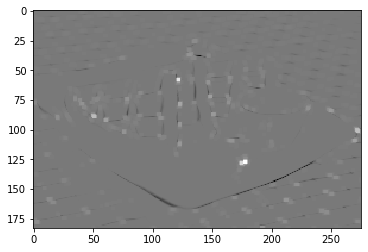

In [2]:
# Convert to grayscale
gray = cv2.cvtColor(image_copy, cv2.COLOR_RGB2GRAY)
gray = np.float32(gray)

# Detect corners 
dst = cv2.cornerHarris(gray, 2, 3, 0.04)

# Dilate corner image to enhance corner points
dst = cv2.dilate(dst,None)

plt.imshow(dst, cmap='gray')


### Extract and display strong corners

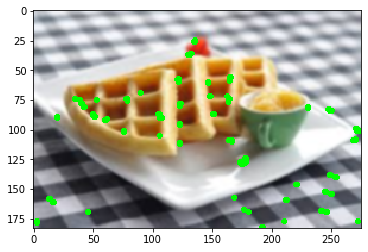

In [3]:
# Define a threshold for extracting strong corners
# This value vary depending on the image and how many corners you want to detect
# Try changing this free parameter, 0.1, to be larger or smaller and see what happens
thresh = 0.1*dst.max()

# Create an image copy to draw corners on
corner_image = np.copy(image_copy)

# Iterate through all the corners and draw them on the image (if they pass the threshold)
for j in range(0, dst.shape[0]):
    for i in range(0, dst.shape[1]):
        if(dst[j,i] > thresh):
            # image, center pt, radius, color, thickness
            cv2.circle( corner_image, (i, j), 1, (0,255,0), 1)

plt.imshow(corner_image)